## Decision Tree Classifier

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import plot_tree

In [2]:
# load the dataset
df = pd.read_csv('Renewable_Energy_Adoption.csv')
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [3]:
# feature selection
X = df.drop('adoption', axis = 1) # df[['car',' ',]]
y = df['adoption']

In [4]:
# splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
# initialise the model with a specified max depth to prevent overfitting.
model = DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [7]:
# metrices
# accuracy score
acc = accuracy_score(y_test,y_pred)
print(f"accuracy score is {acc}")

accuracy score is 0.85


In [8]:
# for confusion matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[16,  1],
       [ 2,  1]])

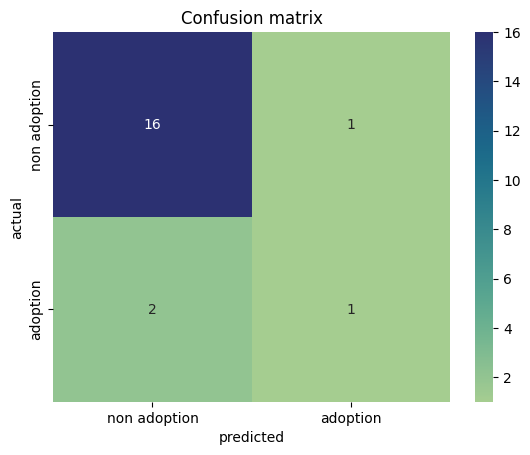

In [9]:
sns.heatmap( cm , annot=True , fmt='d' , cmap='crest',
            xticklabels=['non adoption', 'adoption'],
            yticklabels=['non adoption', 'adoption'])
plt.title('Confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [10]:
# classification report
print(classification_report(y_test,y_pred, target_names=['non adoption','adoption']))

              precision    recall  f1-score   support

non adoption       0.89      0.94      0.91        17
    adoption       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



In [11]:
import joblib
joblib.dump(model , 'DTC_REAdoption.pkl')

['DTC_REAdoption.pkl']

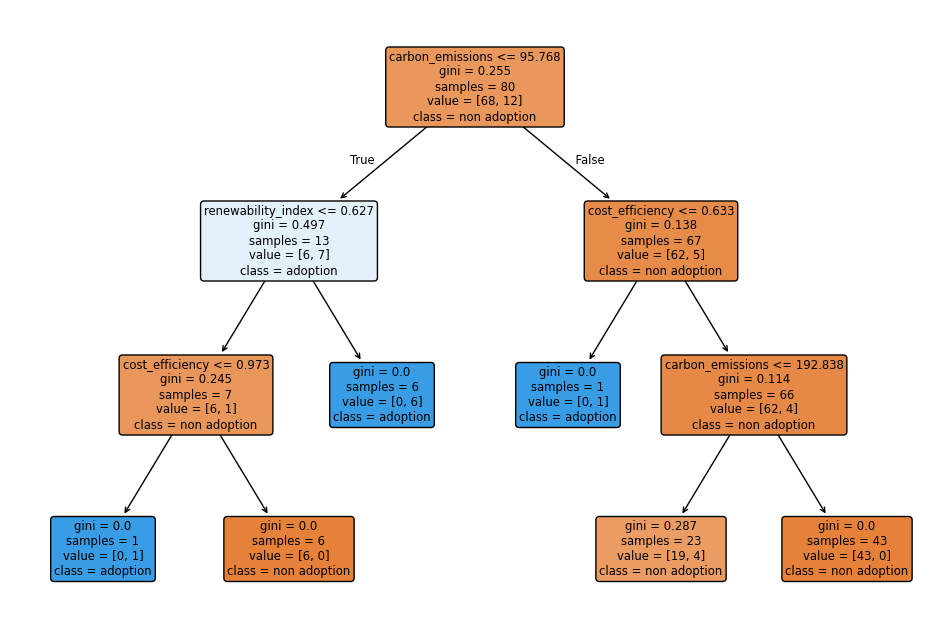

In [12]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['non adoption','adoption'],
          filled=True, rounded=True)
#plt.savefig('dtc_rea.png')
plt.show()